<a href="https://colab.research.google.com/github/MaxBeard/HelloWorldJS/blob/master/Daily_OpenTable_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Hello everyone. Thanks for checking out my work. I will have plenty more to come too.

Please feel free to reach out with tips, criticism, or ways I can help you at johnjtomczak@icloud.com

I found this data set a few days ago a few times. It was all over Hacker News and Twitter and maybe an email newsletter or two. I am using it as a muse to learn some Python data science and modeling tools. Enjoy.

# Importing and Formatting

In [0]:
# the 'capture' magic suppresses the pip output below
%%capture
!pip install xlrd
!pip install psycopg2

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import datetime
from scipy.stats import norm

In [0]:
latest = '03_19'
print( latest )
fl = "https://github.com/johntomczak/Corona_DA/blob/master/opentable_"+str(latest)+".xlsx?raw=true"

print( latest )
d1 = pd.read_excel(fl)
d1 = d1.set_index('Name')

03_19
03_19


In [0]:
# please blame my friend Rem if you go blind on this one - he is the King of One-Lining
d1.columns = pd.Series(d1.columns).apply(lambda x: x.strftime('%m_%d') if type(x) != str else x)

In [0]:
# NOLA has to go because of Mardi Gras moving around on the calendar
d1 = d1.drop('New Orleans')
# just want to stick to N. Am. cities, idk
d1 = d1.drop('London')
d1 = d1.drop('Hamburg')
d1 = d1.drop('Munchen')
d1 = d1.drop('Dublin')

In [0]:
info = d1.describe()
print( info.iloc[:,-3:] )

            03_17       03_18       03_19
count   43.000000   43.000000   43.000000
mean   -92.465116  -96.930233  -98.093023
std     10.929098    6.250316    4.607519
min   -100.000000 -100.000000 -100.000000
25%   -100.000000 -100.000000 -100.000000
50%    -99.000000 -100.000000 -100.000000
75%    -88.000000  -97.000000  -99.500000
max    -55.000000  -75.000000  -83.000000


# Analyses

In [0]:
dt = datetime.datetime.now() - datetime.timedelta(days=1) - datetime.timedelta(hours=4)
print(dt)
t0s = dt
t0 = t0s.strftime('%m_%d')
print(t0)
t1s = t0s - datetime.timedelta(days=1)
t1 = t1s.strftime('%m_%d')
t2s = t1s - datetime.timedelta(days=1)
t2 = t2s.strftime('%m_%d')

2020-03-19 23:19:36.766969
03_19


Text(0, 0.5, 'Count of Reports')

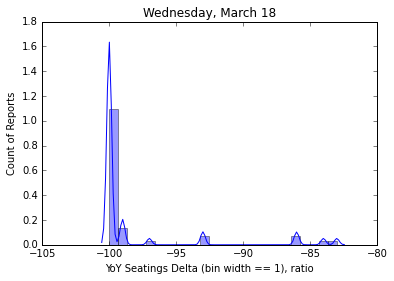

In [0]:
dist_today = sns.distplot( d1[t0], bins=25, norm_hist=True )
plt.title( 'Wednesday, March 18')
plt.xlabel( 'YoY Seatings Delta (bin width == 1), ratio' )
plt.ylabel( 'Count of Reports' )
# ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
# print( str( sum( d1[t0]<=-1) )+" shutdown" )

This is just calculating the dates for the last 3 days - used below.

Text(0.5, 1.0, 'Past 3 Days Cities Distribution')

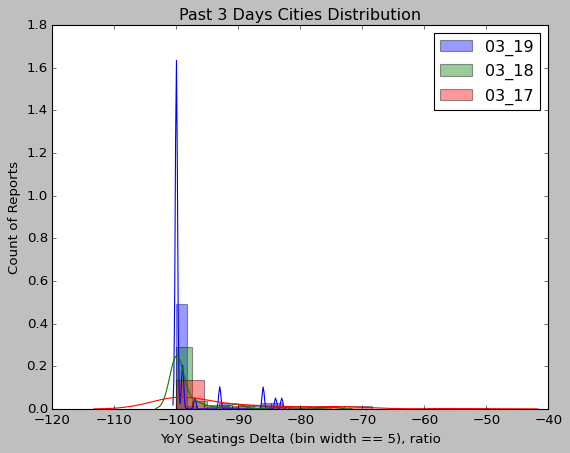

In [0]:
plt.style.use('classic')
y1 = sns.distplot( d1[t0], bins=10, norm_hist=False )
y2= sns.distplot( d1[t1], bins=10, norm_hist=False )
y3 = sns.distplot( d1[t2], bins=10, norm_hist=False )
plt.legend( [str(t0), str(t1), str(t2)] )
plt.xlabel( 'YoY Seatings Delta (bin width == 5), ratio' )
plt.ylabel( 'Count of Reports' )
plt.title( 'Past 3 Days Cities Distribution' )

In [0]:
print( t0 )
print( d1[t0].sort_values() )
print( "shutdown " + str( sum( d1[t0]<=-0.995) ) )
print ( sum( d1[t0]==-1) / d1[t0].describe()['count'] )
print( d1[t0].describe() )

03_19
Name
Miami Beach               -100
Miami                     -100
Vancouver                 -100
Minneapolis               -100
New York                  -100
Philadelphia              -100
Phoenix                   -100
Pittsburgh                -100
Portland                  -100
Raleigh                   -100
San Antonio               -100
San Diego                 -100
San Francisco             -100
San Pedro Garza Garc√≠a   -100
Seattle                   -100
Toronto                   -100
Louisville                -100
Los Angeles               -100
Washington                -100
Indianapolis              -100
Austin                    -100
Baltimore                 -100
Boston                    -100
Charlotte                 -100
Chicago                   -100
Cincinnati                -100
Las Vegas                 -100
Dallas                    -100
Columbus                  -100
Fort Lauderdale           -100
Houston                   -100
Denver                    -1